In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
import json
import sys
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

%matplotlib inline

In [2]:
bmap = brewer2mpl.get_map("Set2", "qualitative", 7)                                                                                                                                                                                                                                                                          
colors = bmap.colors
Lcolors = colors[0:6]

for i in range(6):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color


In [3]:
def HausdorffScore(cfs1, cfs2):
    """
    compute the modified Hausdorff score for measuring the consistency between two sets of counterfactual explanations.
    Arguments:
        cfs1: the first set of counterfactual explanations.
        cfs2: the second set of counterfactual explanations.
    returns: 
        modified Hausdorff distance between two sets.
    """
    cfs1, cfs2 = np.array(cfs1), np.array(cfs2)
    pairwise_distance = cdist(cfs1, cfs2)
    h_A_B = pairwise_distance.min(1).mean()
    h_B_A = pairwise_distance.min(0).mean()

    return max(h_A_B, h_B_A)

# def stat(filename):
#     with open(filename, 'r') as f:
#         data = json.load(f)
    
#     distance = []
#     proximity = []
#     sparsity = []
#     aps = []

#     num = data['num']
#     cfs = data['cf']
#     for i in range(len(cfs)):
#         cf_list = cfs[i]
#         cf_data_list = []
#         cf2_data_list = []
#         for j in range(num[i]):
#             cf = cf_list[j]
#             cf_data_list.extend(cf['cf'])
#             cf2_data_list.extend(cf['cf2'])
#             proximity.append(cf['proximity'])
#             sparsity.append(cf['sparsity'])
#             aps.append(cf['aps'])

#         distance.append(HausdorffScore(cf_data_list, cf2_data_list))

#     return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps)
def stat(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        cf2_data_list = []
        for j in range(len(cf_list)):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            cf2_data_list.extend(cf['cf2'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])

        if len(cf_list) > 0:
            distance.append(HausdorffScore(cf_data_list, cf2_data_list))

    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps)


def stat_cfmss(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    cf2 = data['cf2']
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        for j in range(num[i]):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])
        cf2_data_list = cf2[i]
        distance.append(HausdorffScore(cf_data_list, cf2_data_list))

    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps)

In [4]:
synthetic_gs = "../cfgen/synthetic/synthetic_growingsphere.json"
synthetic_cfproto = "../cfgen/synthetic/synthetic_cfproto.json"
synthetic_plaincf = "../cfgen/synthetic/synthetic_plaincf.json"
synthetic_dice = "../cfgen/synthetic/synthetic_dice.json"
synthetic_sns = "../consistency/code/synthetic_sns.json"
synthetic_cfmss = "../cfgen/synthetic/synthetic_cfmss.json"

syn_distance_gs, syn_proximity_gs, syn_sparsity_gs, syn_aps_gs = stat(synthetic_gs)
syn_distance_cfproto, syn_proximity_cfproto, syn_sparsity_cfproto, syn_aps_cfproto = stat(synthetic_cfproto)
syn_distance_plaincf, syn_proximity_plaincf, syn_sparsity_plaincf, syn_aps_plaincf = stat(synthetic_plaincf)
syn_distance_dice, syn_proximity_dice, syn_sparsity_dice, syn_aps_dice = stat(synthetic_dice)
syn_distance_sns, syn_proximity_sns, syn_sparsity_sns, syn_aps_sns = stat(synthetic_sns)
syn_distance_cfmss, syn_proximity_cfmss, syn_sparsity_cfmss, syn_aps_cfmss = stat_cfmss(synthetic_cfmss)

In [5]:
thyroid_gs = "../cfgen/thyroid/thyroid_growingsphere.json"
thyroid_cfproto = "../cfgen/thyroid/thyroid_cfproto.json"
thyroid_plaincf = "../cfgen/thyroid/thyroid_plaincf.json"
thyroid_dice = "../cfgen/thyroid/thyroid_dice.json"
thyroid_sns = "../consistency/code/thyroid_sns.json"
thyroid_cfmss = "../cfgen/thyroid/thyroid_cfmss.json"

thyroid_distance_gs, thyroid_proximity_gs, thyroid_sparsity_gs, thyroid_aps_gs = stat(thyroid_gs)
thyroid_distance_cfproto, thyroid_proximity_cfproto, thyroid_sparsity_cfproto, thyroid_aps_cfproto = stat(thyroid_cfproto)
thyroid_distance_plaincf, thyroid_proximity_plaincf, thyroid_sparsity_plaincf, thyroid_aps_plaincf = stat(thyroid_plaincf)
thyroid_distance_dice, thyroid_proximity_dice, thyroid_sparsity_dice, thyroid_aps_dice = stat(thyroid_dice)
thyroid_distance_sns, thyroid_proximity_sns, thyroid_sparsity_sns, thyroid_aps_sns = stat(thyroid_sns)
thyroid_distance_cfmss, thyroid_proximity_cfmss, thyroid_sparsity_cfmss, thyroid_aps_cfmss = stat_cfmss(thyroid_cfmss)

In [6]:
hepatitis_gs = "../cfgen/hepatitis/Hepatitis_growingsphere.json"
hepatitis_cfproto = "../cfgen/hepatitis/Hepatitis_cfproto.json"
hepatitis_plaincf = "../cfgen/hepatitis/Hepatitis_plaincf.json"
hepatitis_dice = "../cfgen/hepatitis/Hepatitis_dice.json"
hepatitis_sns = "../consistency/code/hepatitis_sns.json"
hepatitis_cfmss = "../cfgen/hepatitis/Hepatitis_cfmss.json"


hepatitis_distance_gs, hepatitis_proximity_gs, hepatitis_sparsity_gs, hepatitis_aps_gs = stat(hepatitis_gs)
hepatitis_distance_cfproto, hepatitis_proximity_cfproto, hepatitis_sparsity_cfproto, hepatitis_aps_cfproto = stat(hepatitis_cfproto)
hepatitis_distance_plaincf, hepatitis_proximity_plaincf, hepatitis_sparsity_plaincf, hepatitis_aps_plaincf = stat(hepatitis_plaincf)
hepatitis_distance_dice, hepatitis_proximity_dice, hepatitis_sparsity_dice, hepatitis_aps_dice = stat(hepatitis_dice)
hepatitis_distance_sns, hepatitis_proximity_sns, hepatitis_sparsity_sns, hepatitis_aps_sns = stat(hepatitis_sns)
hepatitis_distance_cfmss, hepatitis_proximity_cfmss, hepatitis_sparsity_cfmss, hepatitis_aps_cfmss = stat_cfmss(hepatitis_cfmss)

In [7]:
xaxis_label = ["GS", "PlainCF", "DiCE","CFProto", "SNS", "CEMSP"]
xtick = np.arange(6)

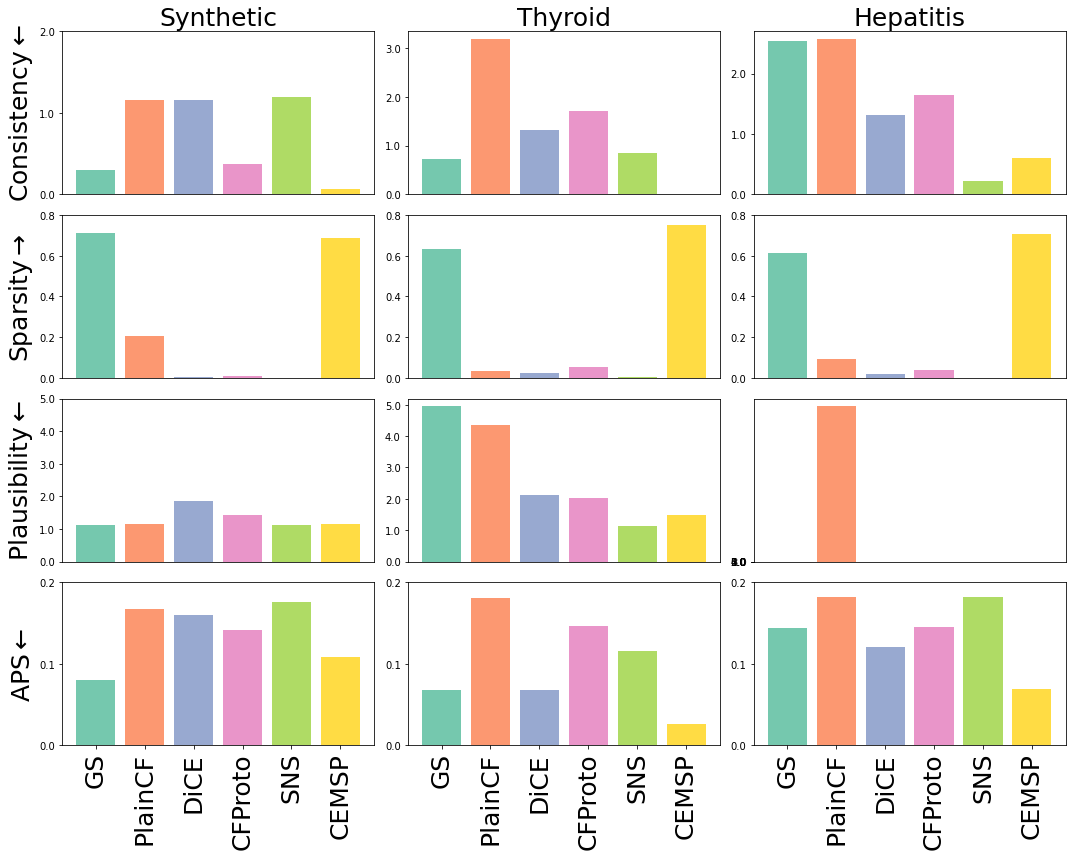

In [8]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
# plt.rcParams["figure.figsize"] = (15, 20)

alpha = 0.9
fontsize = 25

axs[0, 0].bar(xtick,  [syn_distance_gs, syn_distance_plaincf, syn_distance_dice,  syn_distance_cfproto, syn_distance_sns, syn_distance_cfmss], color=Lcolors, alpha = alpha)
axs[0, 1].bar(xtick,  [thyroid_distance_gs, thyroid_distance_plaincf, thyroid_distance_dice,  thyroid_distance_cfproto, thyroid_distance_sns, thyroid_distance_cfmss], color=Lcolors, alpha = alpha)
axs[0, 2].bar(xtick,  [hepatitis_distance_gs, hepatitis_distance_plaincf, hepatitis_distance_dice,  hepatitis_distance_cfproto, hepatitis_distance_sns, hepatitis_distance_cfmss], color=Lcolors, alpha = alpha)


axs[1, 0].bar(xtick,  [syn_sparsity_gs, syn_sparsity_plaincf, syn_sparsity_dice,  syn_sparsity_cfproto, syn_sparsity_sns, syn_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[1, 1].bar(xtick,  [thyroid_sparsity_gs, thyroid_sparsity_plaincf, thyroid_sparsity_dice,  thyroid_sparsity_cfproto, thyroid_sparsity_sns, thyroid_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[1, 2].bar(xtick,  [hepatitis_sparsity_gs, hepatitis_sparsity_plaincf, hepatitis_sparsity_dice,  hepatitis_sparsity_cfproto, hepatitis_sparsity_sns, hepatitis_sparsity_cfmss], color=Lcolors, alpha = alpha)

axs[2, 0].bar(xtick,  [syn_proximity_gs, syn_proximity_plaincf, syn_proximity_dice,  syn_proximity_cfproto, syn_proximity_sns, syn_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[2, 1].bar(xtick,  [thyroid_proximity_gs, thyroid_proximity_plaincf, thyroid_proximity_dice,  thyroid_proximity_cfproto, syn_proximity_sns, thyroid_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[2, 2].bar(xtick,  [hepatitis_proximity_gs, hepatitis_proximity_plaincf, hepatitis_proximity_dice,  hepatitis_proximity_cfproto, hepatitis_proximity_sns, hepatitis_proximity_cfmss], color=Lcolors, alpha = alpha)

axs[3, 0].bar(xtick,  [syn_aps_gs, syn_aps_plaincf, syn_aps_dice,  syn_aps_cfproto, syn_aps_sns, syn_aps_cfmss], color=Lcolors, alpha = alpha)
axs[3, 1].bar(xtick,  [thyroid_aps_gs, thyroid_aps_plaincf, thyroid_aps_dice,  thyroid_aps_cfproto, thyroid_aps_sns, thyroid_aps_cfmss], color=Lcolors, alpha = alpha)
axs[3, 2].bar(xtick,  [hepatitis_aps_gs, hepatitis_aps_plaincf, hepatitis_aps_dice,  hepatitis_aps_cfproto, hepatitis_aps_sns, hepatitis_aps_cfmss], color=Lcolors, alpha = alpha)


# Set Ylabel
axs[0,0].set_ylabel(r"Consistency$\leftarrow$", fontsize = fontsize)
axs[1,0].set_ylabel(r"Sparsity$\rightarrow$", fontsize = fontsize)
axs[2,0].set_ylabel(r"Plausibility$\leftarrow$", fontsize = fontsize)
axs[3,0].set_ylabel(r"APS$\leftarrow$", fontsize = fontsize)

# Set Title
axs[0,0].set_title(r'Synthetic', fontsize = fontsize)
axs[0,1].set_title(r'Thyroid', fontsize = fontsize)
axs[0,2].set_title(r'Hepatitis', fontsize = fontsize)

# Set X tick
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])
axs[2, 0].set_xticks([])
axs[2, 1].set_xticks([])
axs[2, 2].set_xticks([])

axs[3,0].set_xticks(xtick)
axs[3,0].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[3,1].set_xticks(xtick)
axs[3,1].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)
axs[3,2].set_xticks(xtick)
axs[3,2].set_xticklabels(xaxis_label, fontsize = fontsize, rotation = 90)

# Set Y limit
axs[0,0].set_yticks(np.arange(0, 2.3, 1))
axs[0,1].set_yticks(np.arange(0, 3.3, 1))
axs[0,2].set_yticks(np.arange(0, 2.3, 1))

axs[1,0].set_yticks(np.arange(0, 0.82, 0.2))
axs[1,1].set_yticks(np.arange(0, 0.82, 0.2))
axs[1,2].set_yticks(np.arange(0, 0.82, 0.2))


axs[2,0].set_yticks(np.arange(0, 5.5, 1))
axs[2,1].set_yticks(np.arange(0, 5.5, 1))
axs[2,2].set_yticks(np.arange(0, 5.5, 1))


axs[3,0].set_yticks(np.arange(0, 0.27, 0.1))
axs[3,1].set_yticks(np.arange(0, 0.27, 0.1))
axs[3,2].set_yticks(np.arange(0, 0.27, 0.1))

axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[1,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[2,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axs[3,2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


plt.tight_layout()
plt.savefig("experiments43.pdf", dpi = 1200, bbox_inches = 'tight')
plt.show()